Questions to be Explored
1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

Original dataset can be downloaded from the unhcr.org website.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
data = pd.read_csv('can-stats-2012-22.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [7]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [18]:
toprefugees=data.groupby('Country-of-origin')['UNHCR-refugees'].sum().sort_values(ascending=False).head(10).reset_index(name='Total')

In [9]:
toprefugees=data.groupby('Country-of-origin')['UNHCR-refugees'].sum().sort_values(ascending=False).head(10).reset_index(name='Total')

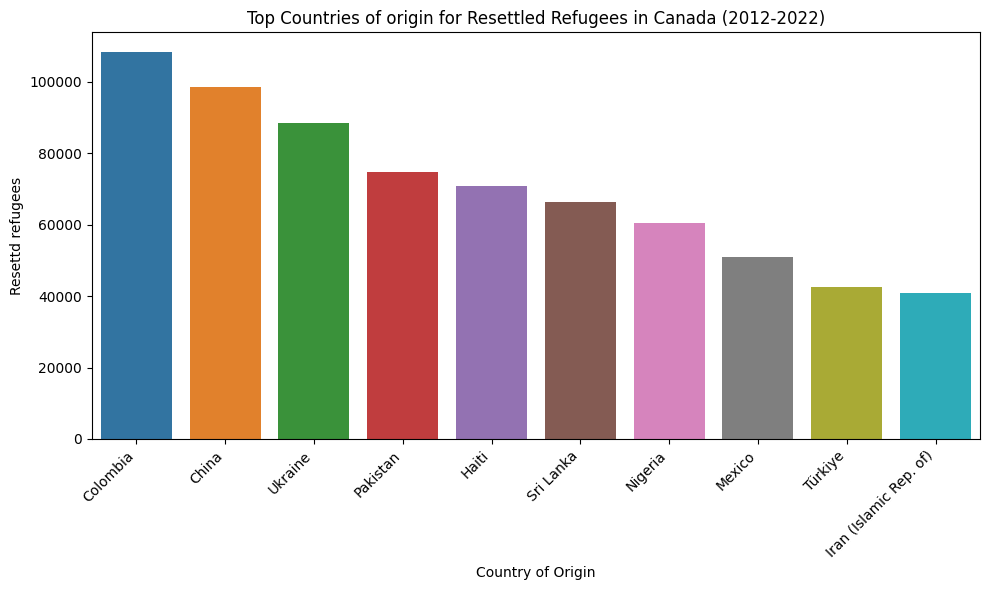

In [31]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(toprefugees, x='Country-of-origin', y='Total', hue='Country-of-origin', legend=False)

plt.xlabel('Country of Origin')
plt.ylabel('Resettd refugees')
plt.title('Top Countries of origin for Resettled Refugees in Canada (2012-2022)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [32]:
total_refugees_yrly = data.groupby('Year')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year')

total_refugees_yrly.reset_index(drop=True)

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


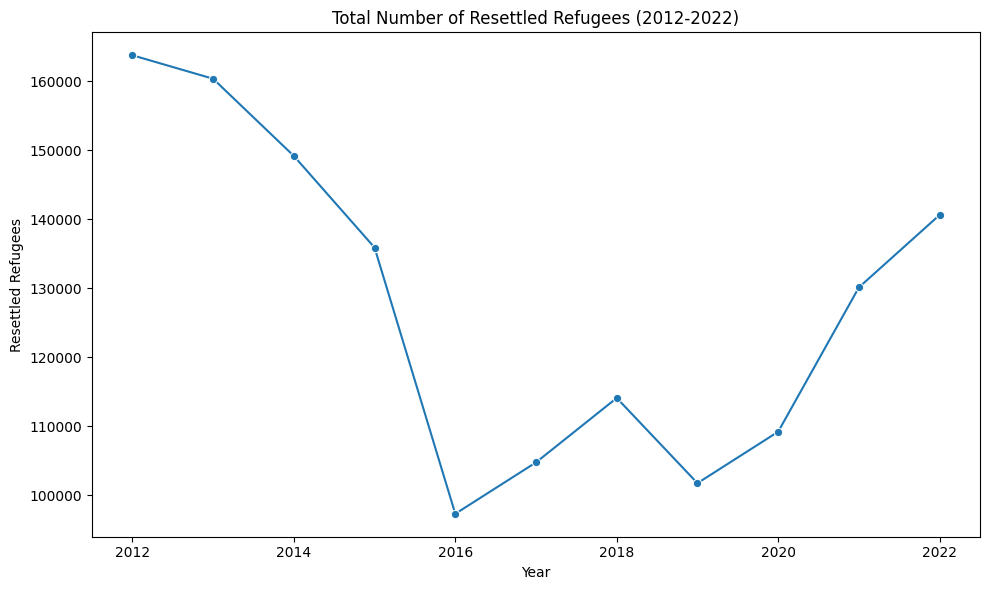

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_refugees_yrly, x='Year', y='UNHCR-refugees', marker='o')

plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

plt.tight_layout()
plt.show()

In [39]:

top_asylum_seekers = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)
top_asylum_seekers.reset_index(drop=True).style.bar()

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


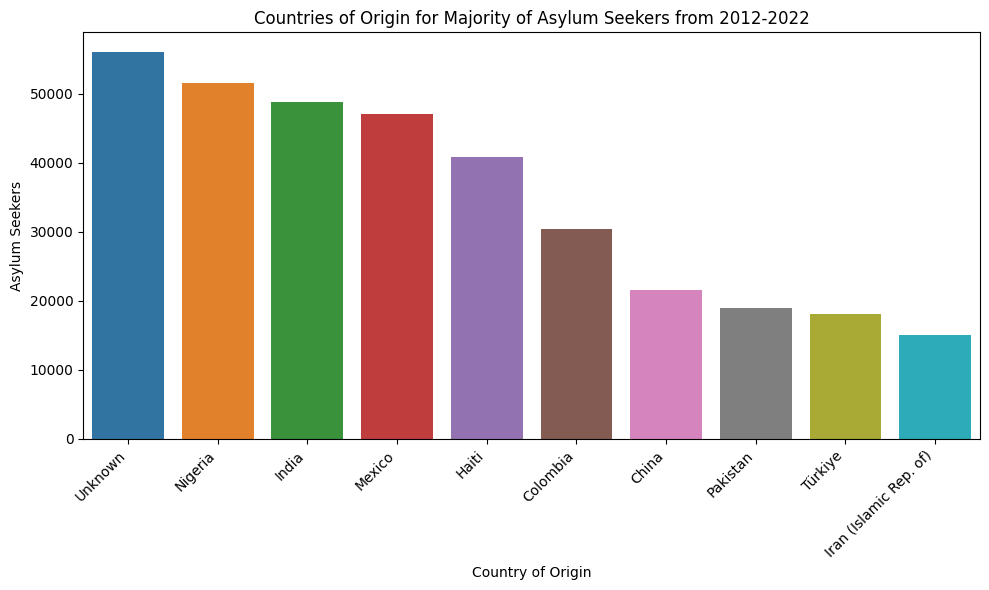

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', hue='Country-of-origin', legend=False)

plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Countries of Origin for Majority of Asylum Seekers from 2012-2022')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [43]:
asylum_seekers_yrly = data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')

asylum_seekers_yrly.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


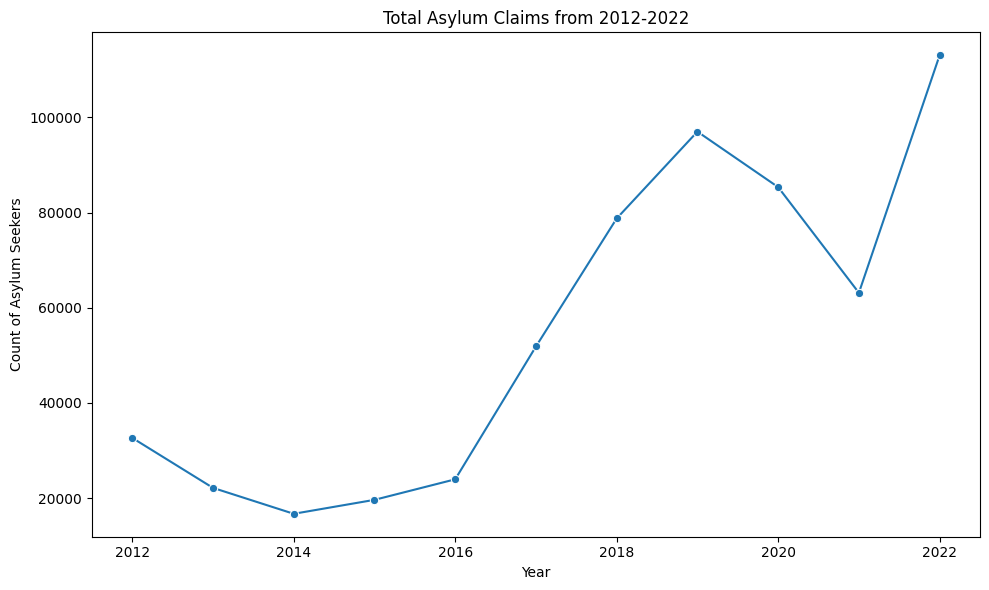

In [45]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=asylum_seekers_yrly, x='Year', y='Asylum-seekers',marker='o')


plt.xlabel('Year')
plt.ylabel('Count of Asylum Seekers')
plt.title('Total Asylum Claims from 2012-2022')


plt.tight_layout()
plt.show()

In [46]:
top_countries = data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by ='total-count', ascending=False).head(10)

top_countries.reset_index(drop=True).style.bar()

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


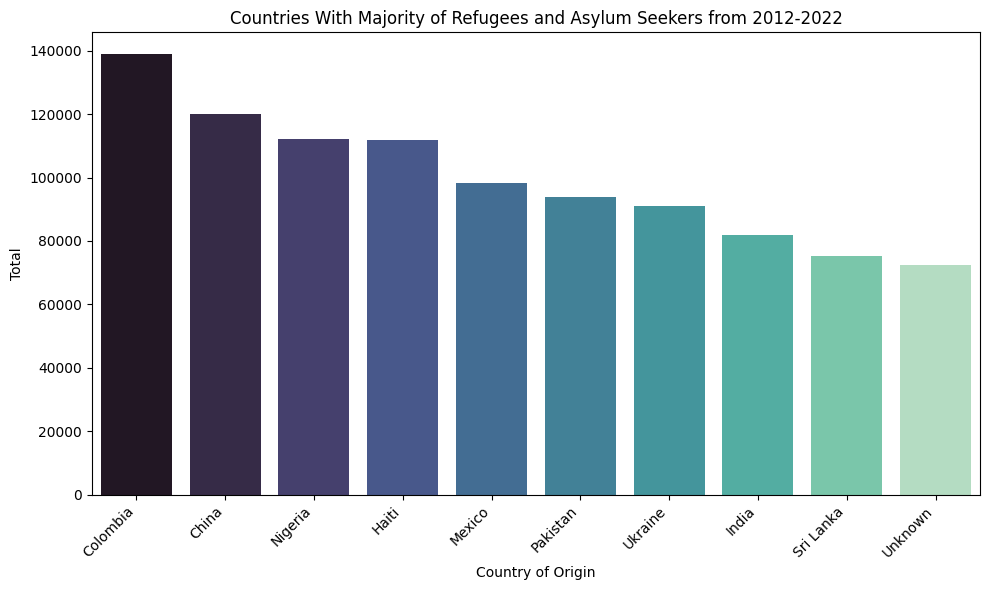

In [48]:

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Country-of-origin', y='total-count', hue='Country-of-origin', palette='mako', legend=False)


plt.xlabel('Country of Origin')
plt.ylabel('Total')
plt.title('Countries With Majority of Refugees and Asylum Seekers from 2012-2022')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

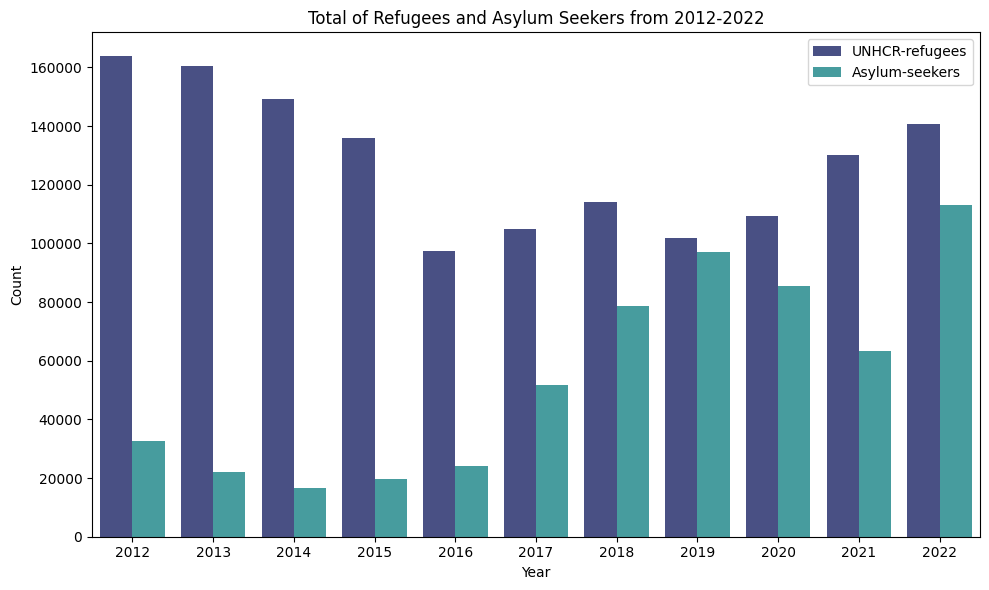

In [49]:

yearly_counts = data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()

melted_data = pd.melt(yearly_counts, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total of Refugees and Asylum Seekers from 2012-2022')

plt.legend()

plt.tight_layout()
plt.show()

2012- 2022 Canada Refugee Statistics EDA Results Summary

1. Countries From Which Canada Has Admitted Highest Number of Refugees:

Colombia (108,416)
China (98,586)
Ukraine (88,376)
Pakistan (74,737)
Haiti (70,956)
Sri Lanka (66,343)
Nigeria (60,554)
Mexico (51,072)
Türkiye (42,533)
Iran (40,881)

2. Total Number of Resettled Refugees in Canada Per Year:

2012: 163,751
2013: 160,347
2014: 149,164
2015: 135,890
2016: 97,322
2017: 104,768
2018: 114,101
2019: 101,757
2020: 109,214
2021: 130,125
2022: 140,621

3. Countries of Origin for Majority of Asylum Claims Made in Canada:

Unknown (56,098)
Nigeria (51,620)
India (48,806)
Mexico (47,146)
Haiti (40,908)
Colombia (30,475)
China (21526)
Pakistan (19,023)
Türkiye (18,166)
Iran (15,011)

4. Total Number of Asylum Claims Made in Canada Every Year:

2012: 32,647
2013: 22,145
2014: 16,699
2015: 19,631
2016: 23,946
2017: 51,859
2018: 78,766
2019: 97,017
2020: 85,352
2021: 63,143
2022: 113,066

5. General Trends in Refugee and Asylum Statistics from 2012-2022:

2012 was the year where Canada admitted the highest number of refugees, followed by 2013, 2014 and 2022.
2016 had the lowest number of resettled refugees
2022 had the highest number of asylum claims made in Canada, followed by 2019 and 2020
2014 had the lowest number of asylum claims, followed by 2015 and 2013